In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn import preprocessing, model_selection
import random

np.__version__

/home/yikun/.local/lib/python3.6/site-packages/OpenSSL/_util.py:6: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  from cryptography.hazmat.bindings.openssl.binding import Binding


'1.19.5'

In [ ]:
#gdown 1V5B7Bt6aJm0UHbR7cRKBEK8jx7lYPVuX
#already in folder

QUALITY_THRESHOLD = 128
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = BATCH_SIZE * 2

(640, 5)
149.0 298.0 447.0


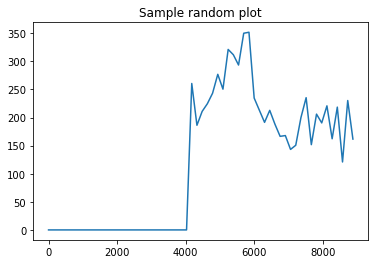

199
60


,time,pos,force,tag
0,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
2,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
3,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
4,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [ ]:
liver = pd.read_csv("p_f_t_liver.csv")#liver tag = 1, 2
print(liver.shape)
liver = liver.drop(['Unnamed: 0'], axis=1)
liver.head()
for row in range(640):
    for idx in range(4):
        liver.iloc[row, idx] = [float(x.strip(' []')) for x in liver.iloc[row, idx].split(',')]
def view_eeg_plot(row):
    time = liver.loc[row, "time"]
    print(time[1],time[2],time[3])
    force =  liver.loc[row, "force"]
    plt.plot(time, force)
    plt.title(f"Sample random plot")
    plt.show()

a_rand = random.randint(0,600)
view_eeg_plot(a_rand)
print(a_rand)
liver.head()


for row in range(640):
    tag =  liver.loc[row, "tag"]
    if tag[-1] == 1:
        liver.loc[row, "tag"] = 1
    elif tag[-1] == 2:
        liver.loc[row, "tag"] = 2
    else:
        liver.loc[row, "tag"] = 0

#all tag is last element of the tag queue

print(len(liver.loc[row, "time"]))

liver.head()


(640, 5)
149.0 298.0 447.0


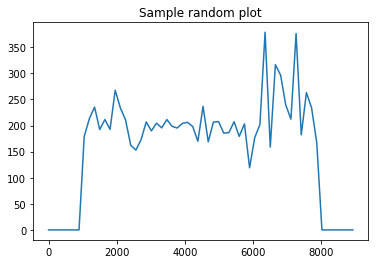

547
60


,time,pos,force,tag
0,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
1,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
2,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,"[0.0, 149.0, 301.0, 453.0, 604.0, 756.0, 907.0...","[0.0, 0.0, 66.0, 145.0, 222.0, 301.0, 378.0, 4...","[0.0, 0.0, 190.12, 181.24, 149.3, 186.42000000...",0
4,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3


In [ ]:
kidney = pd.read_csv("p_f_t_kidney.csv")#kidney tag = 3, 4
print(kidney.shape)
kidney = kidney.drop(['Unnamed: 0'], axis=1)
kidney.head()
for row in range(640):
    for idx in range(4):
        kidney.iloc[row, idx] = [float(x.strip(' []')) for x in kidney.iloc[row, idx].split(',')]
def view_eeg_plot(row):
    time = kidney.loc[row, "time"]
    print(time[1],time[2],time[3])
    force =  kidney.loc[row, "force"]
    plt.plot(time, force)
    plt.title(f"Sample random plot")
    plt.show()

a_rand = random.randint(0,600)
view_eeg_plot(a_rand)
print(a_rand)
kidney.head()


for row in range(640):
    tag =  kidney.loc[row, "tag"]
    if tag[-1] == 1:
        kidney.loc[row, "tag"] = 3
    elif tag[-1] == 2:
        kidney.loc[row, "tag"] = 4
    else:
        kidney.loc[row, "tag"] = 0

#all tag is last element of the tag queue

print(len(kidney.loc[row, "time"]))

kidney.head()


(640, 5)
149.0 298.0 447.0


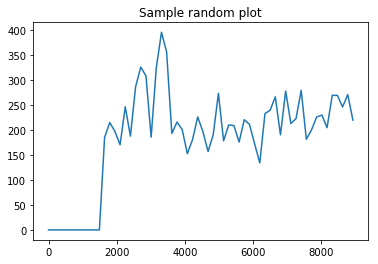

172
60


,time,pos,force,tag
0,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6
1,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6
2,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
3,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
4,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6


In [ ]:
heart = pd.read_csv("p_f_t_heart.csv")#heart tag = 5, 6
print(heart.shape)
heart = heart.drop(['Unnamed: 0'], axis=1)
heart.head()
for row in range(640):
    for idx in range(4):
        heart.iloc[row, idx] = [float(x.strip(' []')) for x in heart.iloc[row, idx].split(',')]
def view_eeg_plot(row):
    time = heart.loc[row, "time"]
    print(time[1],time[2],time[3])
    force =  heart.loc[row, "force"]
    plt.plot(time, force)
    plt.title(f"Sample random plot")
    plt.show()

a_rand = random.randint(0,600)
view_eeg_plot(a_rand)
print(a_rand)
heart.head()


for row in range(640):
    tag =  heart.loc[row, "tag"]
    if tag[-1] == 1:
        heart.loc[row, "tag"] = 5
    elif tag[-1] == 2:
        heart.loc[row, "tag"] = 6
    else:
        heart.loc[row, "tag"] = 0

#all tag is last element of the tag queue

print(len(heart.loc[row, "time"]))

heart.head()


(640, 5)
149.0 298.0 447.0


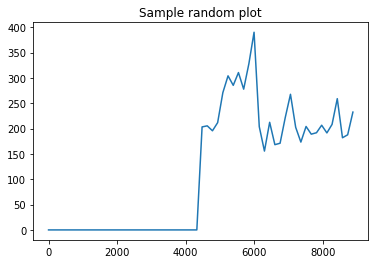

555
60


,time,pos,force,tag
0,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6
1,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
2,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6
3,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 62.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 132.1...",6
4,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5


In [ ]:
heart2 = pd.read_csv("p_f_t_heart2.csv")#heart2 tag = 5, 6
print(heart2.shape)
heart2 = heart2.drop(['Unnamed: 0'], axis=1)
heart2.head()
for row in range(640):
    for idx in range(4):
        heart2.iloc[row, idx] = [float(x.strip(' []')) for x in heart2.iloc[row, idx].split(',')]
def view_eeg_plot(row):
    time = heart2.loc[row, "time"]
    print(time[1],time[2],time[3])
    force =  heart2.loc[row, "force"]
    plt.plot(time, force)
    plt.title(f"Sample random plot")
    plt.show()

a_rand = random.randint(0,600)
view_eeg_plot(a_rand)
print(a_rand)
heart2.head()


for row in range(640):
    tag =  heart2.loc[row, "tag"]
    if tag[-1] == 1:
        heart2.loc[row, "tag"] = 5
    elif tag[-1] == 2:
        heart2.loc[row, "tag"] = 6
    else:
        heart2.loc[row, "tag"] = 0

#all tag is last element of the tag queue

print(len(heart2.loc[row, "time"]))

heart2.head()


(640, 5)
149.0 298.0 447.0


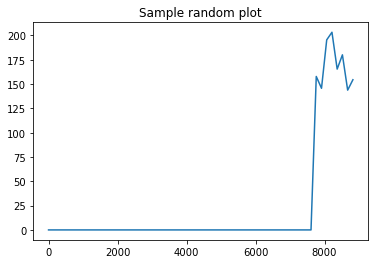

271
60


,time,pos,force,tag
0,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
1,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
2,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8
3,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8
4,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8


In [ ]:
belly = pd.read_csv("p_f_t_belly.csv")#belly tag = 7, 8
print(belly.shape)
belly = belly.drop(['Unnamed: 0'], axis=1)
belly.head()
for row in range(640):
    for idx in range(4):
        belly.iloc[row, idx] = [float(x.strip(' []')) for x in belly.iloc[row, idx].split(',')]
def view_eeg_plot(row):
    time = belly.loc[row, "time"]
    print(time[1],time[2],time[3])
    force =  belly.loc[row, "force"]
    plt.plot(time, force)
    plt.title(f"Sample random plot")
    plt.show()

a_rand = random.randint(0,600)
view_eeg_plot(a_rand)
print(a_rand)
belly.head()


for row in range(640):
    tag =  belly.loc[row, "tag"]
    if tag[-1] == 1:
        belly.loc[row, "tag"] = 7
    elif tag[-1] == 2:
        belly.loc[row, "tag"] = 8
    else:
        belly.loc[row, "tag"] = 0

#all tag is last element of the tag queue

print(len(belly.loc[row, "time"]))

belly.head()


(640, 5)
149.0 298.0 447.0


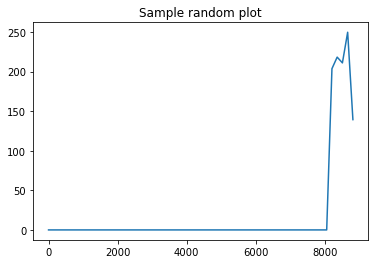

415
60


,time,pos,force,tag
0,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10
1,"[0.0, 149.0, 301.0, 453.0, 604.0, 756.0, 907.0...","[0.0, 0.0, 58.0, 125.0, 189.0, 262.0, 332.0, 3...","[0.0, 0.0, 197.72, 204.44, 200.05, 182.7699999...",0
2,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10
3,"[0.0, 149.0, 298.0, 447.0, 599.0, 751.0, 902.0...","[0.0, 0.0, 0.0, 0.0, 58.0, 125.0, 189.0, 262.0...","[0.0, 0.0, 0.0, 0.0, 197.72, 204.44, 200.05, 1...",0
4,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10
5,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
6,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10
7,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10
8,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10
9,"[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10


In [ ]:
leg = pd.read_csv("p_f_t_leg.csv")#leg tag = 9, 10
print(leg.shape)
leg = leg.drop(['Unnamed: 0'], axis=1)
leg.head()
for row in range(640):
    for idx in range(4):
        leg.iloc[row, idx] = [float(x.strip(' []')) for x in leg.iloc[row, idx].split(',')]
def view_eeg_plot(row):
    time = leg.loc[row, "time"]
    print(time[1],time[2],time[3])
    force =  leg.loc[row, "force"]
    plt.plot(time, force)
    plt.title(f"Sample random plot")
    plt.show()

a_rand = random.randint(0,600)
view_eeg_plot(a_rand)
print(a_rand)
leg.head()


for row in range(640):
    tag =  leg.loc[row, "tag"]
    if tag[-1] == 1:
        leg.loc[row, "tag"] = 9
    elif tag[-1] == 2:
        leg.loc[row, "tag"] = 10
    else:
        leg.loc[row, "tag"] = 0

#all tag is last element of the tag queue

print(len(leg.loc[row, "time"]))

leg.head(40)


11


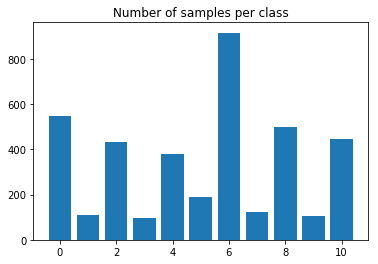

(3840, 60, 2)


In [ ]:
tissues = pd.concat([liver,kidney,heart,heart2,leg,belly],ignore_index=True)
num_classes = len(tissues["tag"].unique())
print(num_classes)
plt.bar(range(num_classes), tissues["tag"].value_counts(sort=False))
plt.title("Number of samples per class")
plt.show()

scaler = preprocessing.MinMaxScaler()
pos_list = [
    scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in tissues["pos"]
]
force_list = [
    scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in tissues["force"]
]
series_list = tf.concat([pos_list, force_list], 2)
series_list = series_list.numpy()

tag_list = [i for i in tissues["tag"]]


print(np.shape(series_list))


In [ ]:
x_train, x_test, tag_train, tag_test = model_selection.train_test_split(
    series_list, tag_list, test_size=0.0625, random_state=42, shuffle=True
)

print(
    f"Length of x_train : {len(x_train)}\nLength of x_test : {len(x_test)}\nLength of y_train : {len(tag_train)}\nLength of y_test : {len(tag_test)}"
)

x_train = np.asarray(x_train).astype(np.float32).reshape(-1, 60, 2)
tag_train = np.asarray(tag_train).astype(np.float32).reshape(-1, 1)
tag_train = keras.utils.to_categorical(tag_train)

print(np.shape(x_train))
print(np.shape(tag_train))
#x_train: 8460 samples, each sample is spilt into 512 sequences (i.e. 1Hz, 512s record)
#y_train: 8460 samples, 19 types of eeg signals

x_test = np.asarray(x_test).astype(np.float32).reshape(-1, 60, 2)
tag_test = np.asarray(tag_test).astype(np.float32).reshape(-1, 1)
tag_test = keras.utils.to_categorical(tag_test)

Length of x_train : 3600
Length of x_test : 240
Length of y_train : 3600
Length of y_test : 240
(3600, 60, 2)
(3600, 11)


In [ ]:
print(x_train)
print(tag_train)

[[[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.92105263 0.47025186]
  [0.9602339  0.55686903]
  [1.         0.64610815]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.9485997  0.4189341 ]
  [0.9726524  0.83583003]
  [1.         0.7828105 ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.91496795 0.4351902 ]
  [0.9539895  0.41472   ]
  [1.         0.44623393]]

 ...

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.9997223  0.        ]
  [0.9997223  0.        ]
  [0.9997223  0.        ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.9601276  0.8494419 ]
  [0.98213714 0.4285789 ]
  [1.         0.5576771 ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.9551059  0.56803316]
  [0.9759722  0.75956494]
  [1.         0.58427954]]]
[[0. 0. 0.

In [ ]:

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, tag_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, tag_test))

print(SHUFFLE_BUFFER_SIZE)
print(BATCH_SIZE)


train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)



print(tf.shape(x_train))


#first shuffle, random dataset index
#then divide into 133 batch, each batch has size of 64, each record in batch has 512 samples

128
64
tf.Tensor([3600   60    2], shape=(3,), dtype=int32)


In [ ]:
vals_dict = {}
for i in tissues["tag"]:
    if i in vals_dict.keys():
        vals_dict[i] += 1
    else:
        vals_dict[i] = 1
total = sum(vals_dict.values())

# Formula used - Naive method where
# weight = 1 - (no. of samples present / total no. of samples)
# So more the samples, lower the weight

weight_dict = {k: (1 - (v / total)) for k, v in vals_dict.items()}
print(weight_dict)
weight_dict[6] = weight_dict[6]*0.8
weight_dict[5] = weight_dict[5]*0.8
print(weight_dict)

{1: 0.9716145833333333, 2: 0.8875, 0: 0.85703125, 4: 0.9018229166666667, 3: 0.9744791666666667, 6: 0.76171875, 5: 0.9502604166666667, 10: 0.884375, 9: 0.9731770833333333, 7: 0.9682291666666667, 8: 0.8697916666666666}
{1: 0.9716145833333333, 2: 0.8875, 0: 0.85703125, 4: 0.9018229166666667, 3: 0.9744791666666667, 6: 0.609375, 5: 0.7602083333333334, 10: 0.884375, 9: 0.9731770833333333, 7: 0.9682291666666667, 8: 0.8697916666666666}


In [ ]:
def plot_history_metrics(history: keras.callbacks.History):
    total_plots = len(history.history)
    cols = total_plots // 2

    rows = total_plots // cols

    if total_plots % cols != 0:
        rows += 1

    pos = range(1, total_plots + 1)
    plt.figure(figsize=(15, 10))
    for i, (key, value) in enumerate(history.history.items()):
        plt.subplot(rows, cols, pos[i])
        plt.plot(range(len(value)), value)
        plt.title(str(key))
    plt.show()

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res


In [ ]:
def build_model(
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):


    input_layer = keras.Input(shape=(60, 2))
    x = input_layer
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    output_layer = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs=input_layer, outputs=output_layer)


In [ ]:

tissues_model = build_model(
    head_size=512,
    num_heads=8,
    ff_dim=8,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.3,
    dropout=0.15,
)


print(tissues_model.summary())
epochs = 30



tissues_model.compile(

    loss = keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
            keras.metrics.AUC(),
            keras.metrics.Precision(),
            keras.metrics.Recall(),
        ],
)





callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

tissues_model_history = tissues_model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=test_dataset,
    class_weight=weight_dict,
)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60, 2)]      0                                            
__________________________________________________________________________________________________
layer_normalization (LayerNorma (None, 60, 2)        4           input_1[0][0]                    
__________________________________________________________________________________________________
multi_head_attention (MultiHead (None, 60, 2)        45058       layer_normalization[0][0]        
                                                                 layer_normalization[0][0]        
__________________________________________________________________________________________________
dropout (Dropout)               (None, 60, 2)        0           multi_head_attention[0][0]   

57/57 [==============================] - 8s 63ms/step - loss: 1.8849 - auc: 0.6756 - precision: 0.5637 - recall: 0.0406 - val_loss: 2.0623 - val_auc: 0.7595 - val_precision: 0.4697 - val_recall: 0.1292
Epoch 2/30
57/57 [==============================] - 3s 50ms/step - loss: 1.7842 - auc: 0.7284 - precision: 0.5436 - recall: 0.0519 - val_loss: 2.0693 - val_auc: 0.7731 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
57/57 [==============================] - 3s 50ms/step - loss: 1.7961 - auc: 0.7208 - precision: 0.4667 - recall: 0.0175 - val_loss: 1.9301 - val_auc: 0.7952 - val_precision: 0.5000 - val_recall: 0.0042
Epoch 4/30
57/57 [==============================] - 3s 50ms/step - loss: 1.7217 - auc: 0.7493 - precision: 0.4503 - recall: 0.0189 - val_loss: 2.0589 - val_auc: 0.7374 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
57/57 [==============================] - 3s 50ms/step - loss: 1.7385 - auc: 0.7312 - precision: 0.5156 - recall: 0.0092 - val_loss: 

In [ ]:
strategy = tf.distribute.MirroredStrategy()
print("Number of devices: {}".format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:5', '/job:localhost/replica:0/task:0/device:GPU:6')
Number of devices: 7


In [ ]:
input_shape = x_train.shape[1:]
with strategy.scope():


    tissues_model = build_model(
        head_size=256,
        num_heads=4,
        ff_dim=4,
        num_transformer_blocks=8,
        mlp_units=[128],
        mlp_dropout=0.2,
        dropout=0.1,
    )


    print(tissues_model.summary())
    epochs = 600



    tissues_model.compile(

        loss = keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=[
                keras.metrics.AUC(),
                keras.metrics.Precision(),
                keras.metrics.Recall(),
            ],
    )





    callbacks = [
        keras.callbacks.ModelCheckpoint(
            "best_model.h5", save_best_only=True, monitor="loss"
        )
    ]


    tissues_model_history = tissues_model.fit(
        train_dataset,
        epochs=epochs,
        callbacks=callbacks,
        validation_data=test_dataset,
        class_weight=weight_dict,
    )


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 60, 2)]      0                                            
__________________________________________________________________________________________________
layer_normalization_32 (LayerNo (None, 60, 2)        4           input_5[0][0]                    
__________________________________________________________________________________________________
multi_head_attention_16 (MultiH (None, 60, 2)        11266       layer_normalization_32[0][0]     
                                                                 layer_normalization_32[0][0]     
__________________________________________________________________________________________________
dropout_36 (Dropout)            (None, 60, 2)        0           multi_head_attention_16[0][

Epoch 1/600
INFO:tensorflow:batch_all_reduce: 132 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 132 all-reduces with algorithm = nccl, num_packs = 1
57/57 [==============================] - 70s 213ms/step - loss: 1.9515 - auc_4: 0.6572 - precision_4: 0.3861 - recall_4: 0.0169 - val_loss: 2.0593 - val_auc_4: 0.7421 - val_precision_4: 1.0000 - val_recall_4: 0.0583
Epoch 2/600
57/57 [==============================] - 4s 71ms/step - loss: 1.8216 - auc_4: 0.7099 - precision_4: 0.6180 - recall_4: 0.0306 - val_loss: 1.9749 - val_auc_4: 0.7726 - val_precision_4: 1.0000 - val_recall_4: 0.0583
Epoch 3/600
57/57 [==============================] - 4s 72ms/step - loss: 1.7444 - auc_4: 0.7347 - precision_4: 0.8403 - recall_4: 0.0556 - val_loss: 1.9063 - val_auc_4: 0.8072 - val_precision_4: 1.0000 - val_recall_4: 0.0625
Epoch 4/600
57/57 [==============================] - 4s 73ms/step - loss: 1.6928 - auc_4: 0.7482 - precision_4: 0.8423 - recall_4: 0.0519 - val_lo

57/57 [==============================] - 4s 72ms/step - loss: 1.8001 - auc_4: 0.7406 - precision_4: 0.6027 - recall_4: 0.0742 - val_loss: 1.8468 - val_auc_4: 0.7890 - val_precision_4: 0.8421 - val_recall_4: 0.0667
Epoch 37/600
57/57 [==============================] - 4s 72ms/step - loss: 1.6858 - auc_4: 0.7534 - precision_4: 0.7264 - recall_4: 0.0664 - val_loss: 1.8293 - val_auc_4: 0.8023 - val_precision_4: 0.8421 - val_recall_4: 0.0667
Epoch 38/600
57/57 [==============================] - 4s 72ms/step - loss: 1.6284 - auc_4: 0.7683 - precision_4: 0.7477 - recall_4: 0.0675 - val_loss: 1.8194 - val_auc_4: 0.8144 - val_precision_4: 0.8824 - val_recall_4: 0.0625
Epoch 39/600
57/57 [==============================] - 4s 71ms/step - loss: 1.6026 - auc_4: 0.7770 - precision_4: 0.7823 - recall_4: 0.0689 - val_loss: 1.8299 - val_auc_4: 0.8097 - val_precision_4: 0.8824 - val_recall_4: 0.0625
Epoch 40/600
57/57 [==============================] - 4s 72ms/step - loss: 1.5873 - auc_4: 0.7804 - preci

Epoch 72/600
57/57 [==============================] - 4s 73ms/step - loss: 1.5873 - auc_4: 0.7814 - precision_4: 0.7750 - recall_4: 0.0603 - val_loss: 1.8295 - val_auc_4: 0.8071 - val_precision_4: 0.8824 - val_recall_4: 0.0625
Epoch 73/600
57/57 [==============================] - 4s 71ms/step - loss: 1.5811 - auc_4: 0.7828 - precision_4: 0.7724 - recall_4: 0.0622 - val_loss: 1.8253 - val_auc_4: 0.8019 - val_precision_4: 0.8824 - val_recall_4: 0.0625
Epoch 74/600
57/57 [==============================] - 4s 70ms/step - loss: 1.5704 - auc_4: 0.7871 - precision_4: 0.7746 - recall_4: 0.0611 - val_loss: 1.8200 - val_auc_4: 0.8046 - val_precision_4: 0.8824 - val_recall_4: 0.0625
Epoch 75/600
57/57 [==============================] - 4s 71ms/step - loss: 1.5588 - auc_4: 0.7918 - precision_4: 0.8295 - recall_4: 0.0703 - val_loss: 1.7970 - val_auc_4: 0.8152 - val_precision_4: 0.8824 - val_recall_4: 0.0625
Epoch 76/600
57/57 [==============================] - 4s 72ms/step - loss: 1.5418 - auc_4: 0

57/57 [==============================] - 4s 71ms/step - loss: 1.2520 - auc_4: 0.8720 - precision_4: 0.7813 - recall_4: 0.1717 - val_loss: 1.4737 - val_auc_4: 0.8757 - val_precision_4: 0.7547 - val_recall_4: 0.1667
Epoch 109/600
57/57 [==============================] - 4s 69ms/step - loss: 1.2460 - auc_4: 0.8723 - precision_4: 0.7769 - recall_4: 0.1703 - val_loss: 1.5029 - val_auc_4: 0.8727 - val_precision_4: 0.7600 - val_recall_4: 0.1583
Epoch 110/600
57/57 [==============================] - 4s 72ms/step - loss: 1.2720 - auc_4: 0.8669 - precision_4: 0.7954 - recall_4: 0.1631 - val_loss: 1.4979 - val_auc_4: 0.8721 - val_precision_4: 0.8043 - val_recall_4: 0.1542
Epoch 111/600
57/57 [==============================] - 4s 71ms/step - loss: 1.2714 - auc_4: 0.8672 - precision_4: 0.7690 - recall_4: 0.1544 - val_loss: 1.4960 - val_auc_4: 0.8735 - val_precision_4: 0.7800 - val_recall_4: 0.1625
Epoch 112/600
57/57 [==============================] - 4s 70ms/step - loss: 1.2577 - auc_4: 0.8699 - p

Epoch 144/600
57/57 [==============================] - 4s 73ms/step - loss: 1.0522 - auc_4: 0.9134 - precision_4: 0.7872 - recall_4: 0.2867 - val_loss: 1.3856 - val_auc_4: 0.8930 - val_precision_4: 0.7143 - val_recall_4: 0.2500
Epoch 145/600
57/57 [==============================] - 4s 71ms/step - loss: 1.0426 - auc_4: 0.9153 - precision_4: 0.7898 - recall_4: 0.2881 - val_loss: 1.4043 - val_auc_4: 0.8916 - val_precision_4: 0.6915 - val_recall_4: 0.2708
Epoch 146/600
57/57 [==============================] - 4s 71ms/step - loss: 1.0375 - auc_4: 0.9151 - precision_4: 0.7924 - recall_4: 0.3000 - val_loss: 1.3962 - val_auc_4: 0.8934 - val_precision_4: 0.7059 - val_recall_4: 0.3000
Epoch 147/600
57/57 [==============================] - 4s 71ms/step - loss: 1.0359 - auc_4: 0.9157 - precision_4: 0.7807 - recall_4: 0.3056 - val_loss: 1.3850 - val_auc_4: 0.8898 - val_precision_4: 0.6739 - val_recall_4: 0.2583
Epoch 148/600
57/57 [==============================] - 4s 71ms/step - loss: 1.0329 - auc

Epoch 180/600
57/57 [==============================] - 4s 71ms/step - loss: 0.9402 - auc_4: 0.9329 - precision_4: 0.7878 - recall_4: 0.3817 - val_loss: 1.3630 - val_auc_4: 0.9036 - val_precision_4: 0.7034 - val_recall_4: 0.3458
Epoch 181/600
57/57 [==============================] - 4s 73ms/step - loss: 0.9694 - auc_4: 0.9272 - precision_4: 0.7948 - recall_4: 0.3669 - val_loss: 1.3667 - val_auc_4: 0.8987 - val_precision_4: 0.7018 - val_recall_4: 0.3333
Epoch 182/600
57/57 [==============================] - 4s 71ms/step - loss: 0.9877 - auc_4: 0.9251 - precision_4: 0.7696 - recall_4: 0.3600 - val_loss: 1.3305 - val_auc_4: 0.9009 - val_precision_4: 0.7642 - val_recall_4: 0.3375
Epoch 183/600
57/57 [==============================] - 4s 71ms/step - loss: 0.9458 - auc_4: 0.9318 - precision_4: 0.7813 - recall_4: 0.3850 - val_loss: 1.4256 - val_auc_4: 0.8968 - val_precision_4: 0.7063 - val_recall_4: 0.3708
Epoch 184/600
57/57 [==============================] - 4s 73ms/step - loss: 0.9272 - auc

Epoch 216/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8910 - auc_4: 0.9401 - precision_4: 0.7890 - recall_4: 0.4206 - val_loss: 1.3675 - val_auc_4: 0.9050 - val_precision_4: 0.7109 - val_recall_4: 0.3792
Epoch 217/600
57/57 [==============================] - 6s 100ms/step - loss: 0.8737 - auc_4: 0.9428 - precision_4: 0.7959 - recall_4: 0.4289 - val_loss: 1.3348 - val_auc_4: 0.9084 - val_precision_4: 0.7364 - val_recall_4: 0.3958
Epoch 218/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8891 - auc_4: 0.9402 - precision_4: 0.7840 - recall_4: 0.4264 - val_loss: 2.0300 - val_auc_4: 0.8634 - val_precision_4: 0.5792 - val_recall_4: 0.4417
Epoch 219/600
57/57 [==============================] - 4s 74ms/step - loss: 1.0418 - auc_4: 0.9205 - precision_4: 0.7333 - recall_4: 0.4147 - val_loss: 1.4295 - val_auc_4: 0.8906 - val_precision_4: 0.7290 - val_recall_4: 0.3250
Epoch 220/600
57/57 [==============================] - 4s 71ms/step - loss: 0.9584 - au

Epoch 252/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8817 - auc_4: 0.9407 - precision_4: 0.8073 - recall_4: 0.4306 - val_loss: 1.3795 - val_auc_4: 0.9019 - val_precision_4: 0.7200 - val_recall_4: 0.3750
Epoch 253/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8969 - auc_4: 0.9390 - precision_4: 0.7815 - recall_4: 0.4292 - val_loss: 1.3929 - val_auc_4: 0.9005 - val_precision_4: 0.7200 - val_recall_4: 0.3750
Epoch 254/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8726 - auc_4: 0.9423 - precision_4: 0.7914 - recall_4: 0.4364 - val_loss: 1.3707 - val_auc_4: 0.8981 - val_precision_4: 0.7317 - val_recall_4: 0.3750
Epoch 255/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8691 - auc_4: 0.9429 - precision_4: 0.7996 - recall_4: 0.4400 - val_loss: 1.4031 - val_auc_4: 0.8978 - val_precision_4: 0.7586 - val_recall_4: 0.3667
Epoch 256/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8690 - auc

Epoch 288/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8392 - auc_4: 0.9467 - precision_4: 0.8028 - recall_4: 0.4636 - val_loss: 1.3900 - val_auc_4: 0.9037 - val_precision_4: 0.6818 - val_recall_4: 0.3750
Epoch 289/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8309 - auc_4: 0.9481 - precision_4: 0.8079 - recall_4: 0.4592 - val_loss: 1.3734 - val_auc_4: 0.9002 - val_precision_4: 0.7179 - val_recall_4: 0.3500
Epoch 290/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8360 - auc_4: 0.9471 - precision_4: 0.8203 - recall_4: 0.4553 - val_loss: 1.3995 - val_auc_4: 0.8979 - val_precision_4: 0.7387 - val_recall_4: 0.3417
Epoch 291/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8376 - auc_4: 0.9471 - precision_4: 0.8073 - recall_4: 0.4703 - val_loss: 1.3717 - val_auc_4: 0.9012 - val_precision_4: 0.7241 - val_recall_4: 0.3500
Epoch 292/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8349 - auc

Epoch 324/600
57/57 [==============================] - 4s 72ms/step - loss: 0.9123 - auc_4: 0.9367 - precision_4: 0.7910 - recall_4: 0.4206 - val_loss: 1.3995 - val_auc_4: 0.8971 - val_precision_4: 0.7339 - val_recall_4: 0.3333
Epoch 325/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8657 - auc_4: 0.9436 - precision_4: 0.7910 - recall_4: 0.4394 - val_loss: 1.3919 - val_auc_4: 0.8993 - val_precision_4: 0.7477 - val_recall_4: 0.3458
Epoch 326/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8804 - auc_4: 0.9413 - precision_4: 0.8037 - recall_4: 0.4447 - val_loss: 1.3794 - val_auc_4: 0.8944 - val_precision_4: 0.7570 - val_recall_4: 0.3375
Epoch 327/600
57/57 [==============================] - 4s 70ms/step - loss: 0.8746 - auc_4: 0.9425 - precision_4: 0.7964 - recall_4: 0.4400 - val_loss: 1.4027 - val_auc_4: 0.8965 - val_precision_4: 0.7431 - val_recall_4: 0.3375
Epoch 328/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8724 - auc

Epoch 360/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8708 - auc_4: 0.9428 - precision_4: 0.8028 - recall_4: 0.4511 - val_loss: 1.4096 - val_auc_4: 0.9010 - val_precision_4: 0.7094 - val_recall_4: 0.3458
Epoch 361/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8297 - auc_4: 0.9479 - precision_4: 0.8093 - recall_4: 0.4681 - val_loss: 1.4735 - val_auc_4: 0.8862 - val_precision_4: 0.7019 - val_recall_4: 0.3042
Epoch 362/600
57/57 [==============================] - 4s 72ms/step - loss: 0.9084 - auc_4: 0.9373 - precision_4: 0.7944 - recall_4: 0.4164 - val_loss: 1.4533 - val_auc_4: 0.8952 - val_precision_4: 0.7321 - val_recall_4: 0.3417
Epoch 363/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8832 - auc_4: 0.9411 - precision_4: 0.8012 - recall_4: 0.4356 - val_loss: 1.4250 - val_auc_4: 0.8997 - val_precision_4: 0.7155 - val_recall_4: 0.3458
Epoch 364/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8657 - auc

Epoch 396/600
57/57 [==============================] - 4s 72ms/step - loss: 0.9315 - auc_4: 0.9347 - precision_4: 0.7612 - recall_4: 0.4189 - val_loss: 1.4701 - val_auc_4: 0.8932 - val_precision_4: 0.6822 - val_recall_4: 0.3042
Epoch 397/600
57/57 [==============================] - 4s 70ms/step - loss: 0.9128 - auc_4: 0.9371 - precision_4: 0.7788 - recall_4: 0.4294 - val_loss: 1.4172 - val_auc_4: 0.9004 - val_precision_4: 0.6930 - val_recall_4: 0.3292
Epoch 398/600
57/57 [==============================] - 4s 72ms/step - loss: 0.9035 - auc_4: 0.9381 - precision_4: 0.7970 - recall_4: 0.4286 - val_loss: 1.4547 - val_auc_4: 0.8970 - val_precision_4: 0.6721 - val_recall_4: 0.3417
Epoch 399/600
57/57 [==============================] - 4s 72ms/step - loss: 0.9122 - auc_4: 0.9375 - precision_4: 0.7753 - recall_4: 0.4333 - val_loss: 1.4243 - val_auc_4: 0.9015 - val_precision_4: 0.6935 - val_recall_4: 0.3583
Epoch 400/600
57/57 [==============================] - 4s 72ms/step - loss: 0.9027 - auc

Epoch 432/600
57/57 [==============================] - 4s 71ms/step - loss: 0.9056 - auc_4: 0.9380 - precision_4: 0.7548 - recall_4: 0.4456 - val_loss: 1.5159 - val_auc_4: 0.8916 - val_precision_4: 0.6746 - val_recall_4: 0.3542
Epoch 433/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8822 - auc_4: 0.9409 - precision_4: 0.7793 - recall_4: 0.4619 - val_loss: 1.4901 - val_auc_4: 0.8942 - val_precision_4: 0.6585 - val_recall_4: 0.3375
Epoch 434/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8899 - auc_4: 0.9422 - precision_4: 0.7873 - recall_4: 0.4525 - val_loss: 1.4272 - val_auc_4: 0.8982 - val_precision_4: 0.6949 - val_recall_4: 0.3417
Epoch 435/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8594 - auc_4: 0.9444 - precision_4: 0.8016 - recall_4: 0.4614 - val_loss: 1.4008 - val_auc_4: 0.9046 - val_precision_4: 0.6942 - val_recall_4: 0.3500
Epoch 436/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8543 - auc

Epoch 468/600
57/57 [==============================] - 4s 72ms/step - loss: 0.9109 - auc_4: 0.9376 - precision_4: 0.7823 - recall_4: 0.4153 - val_loss: 1.3834 - val_auc_4: 0.8993 - val_precision_4: 0.7143 - val_recall_4: 0.3333
Epoch 469/600
57/57 [==============================] - 4s 72ms/step - loss: 0.9351 - auc_4: 0.9342 - precision_4: 0.7609 - recall_4: 0.4164 - val_loss: 1.4145 - val_auc_4: 0.8955 - val_precision_4: 0.7018 - val_recall_4: 0.3333
Epoch 470/600
57/57 [==============================] - 4s 70ms/step - loss: 0.9217 - auc_4: 0.9355 - precision_4: 0.7768 - recall_4: 0.4206 - val_loss: 1.3818 - val_auc_4: 0.9037 - val_precision_4: 0.7069 - val_recall_4: 0.3417
Epoch 471/600
57/57 [==============================] - 4s 71ms/step - loss: 0.9353 - auc_4: 0.9347 - precision_4: 0.7739 - recall_4: 0.4108 - val_loss: 1.3585 - val_auc_4: 0.9062 - val_precision_4: 0.7025 - val_recall_4: 0.3542
Epoch 472/600
57/57 [==============================] - 4s 72ms/step - loss: 0.9116 - auc

Epoch 504/600
57/57 [==============================] - 4s 73ms/step - loss: 0.8422 - auc_4: 0.9466 - precision_4: 0.8016 - recall_4: 0.4681 - val_loss: 1.3853 - val_auc_4: 0.9046 - val_precision_4: 0.6667 - val_recall_4: 0.3333
Epoch 505/600
57/57 [==============================] - 4s 73ms/step - loss: 0.8485 - auc_4: 0.9465 - precision_4: 0.7939 - recall_4: 0.4569 - val_loss: 1.3973 - val_auc_4: 0.9062 - val_precision_4: 0.7203 - val_recall_4: 0.3542
Epoch 506/600
57/57 [==============================] - 4s 71ms/step - loss: 0.8323 - auc_4: 0.9478 - precision_4: 0.7974 - recall_4: 0.4603 - val_loss: 1.4165 - val_auc_4: 0.9057 - val_precision_4: 0.6838 - val_recall_4: 0.3333
Epoch 507/600
57/57 [==============================] - 4s 73ms/step - loss: 0.8261 - auc_4: 0.9488 - precision_4: 0.8077 - recall_4: 0.4692 - val_loss: 1.4112 - val_auc_4: 0.9005 - val_precision_4: 0.6777 - val_recall_4: 0.3417
Epoch 508/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8229 - auc

Epoch 540/600
57/57 [==============================] - 4s 72ms/step - loss: 0.7822 - auc_4: 0.9548 - precision_4: 0.8184 - recall_4: 0.4958 - val_loss: 1.4670 - val_auc_4: 0.9010 - val_precision_4: 0.6894 - val_recall_4: 0.3792
Epoch 541/600
57/57 [==============================] - 4s 71ms/step - loss: 0.7986 - auc_4: 0.9523 - precision_4: 0.8109 - recall_4: 0.4931 - val_loss: 1.4791 - val_auc_4: 0.8986 - val_precision_4: 0.7109 - val_recall_4: 0.3792
Epoch 542/600
57/57 [==============================] - 4s 73ms/step - loss: 0.7945 - auc_4: 0.9527 - precision_4: 0.8071 - recall_4: 0.4950 - val_loss: 1.4840 - val_auc_4: 0.9034 - val_precision_4: 0.6923 - val_recall_4: 0.3750
Epoch 543/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8014 - auc_4: 0.9517 - precision_4: 0.7898 - recall_4: 0.4906 - val_loss: 1.5411 - val_auc_4: 0.8997 - val_precision_4: 0.6587 - val_recall_4: 0.3458
Epoch 544/600
57/57 [==============================] - 4s 71ms/step - loss: 0.7993 - auc

Epoch 576/600
57/57 [==============================] - 4s 73ms/step - loss: 0.8760 - auc_4: 0.9413 - precision_4: 0.7831 - recall_4: 0.4694 - val_loss: 1.7082 - val_auc_4: 0.8847 - val_precision_4: 0.6640 - val_recall_4: 0.3458
Epoch 577/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8982 - auc_4: 0.9396 - precision_4: 0.7507 - recall_4: 0.4675 - val_loss: 1.7051 - val_auc_4: 0.8858 - val_precision_4: 0.6525 - val_recall_4: 0.3833
Epoch 578/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8402 - auc_4: 0.9471 - precision_4: 0.7901 - recall_4: 0.4944 - val_loss: 1.6621 - val_auc_4: 0.8886 - val_precision_4: 0.6284 - val_recall_4: 0.3875
Epoch 579/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8215 - auc_4: 0.9490 - precision_4: 0.7871 - recall_4: 0.4981 - val_loss: 1.6630 - val_auc_4: 0.8923 - val_precision_4: 0.6528 - val_recall_4: 0.3917
Epoch 580/600
57/57 [==============================] - 4s 72ms/step - loss: 0.8352 - auc

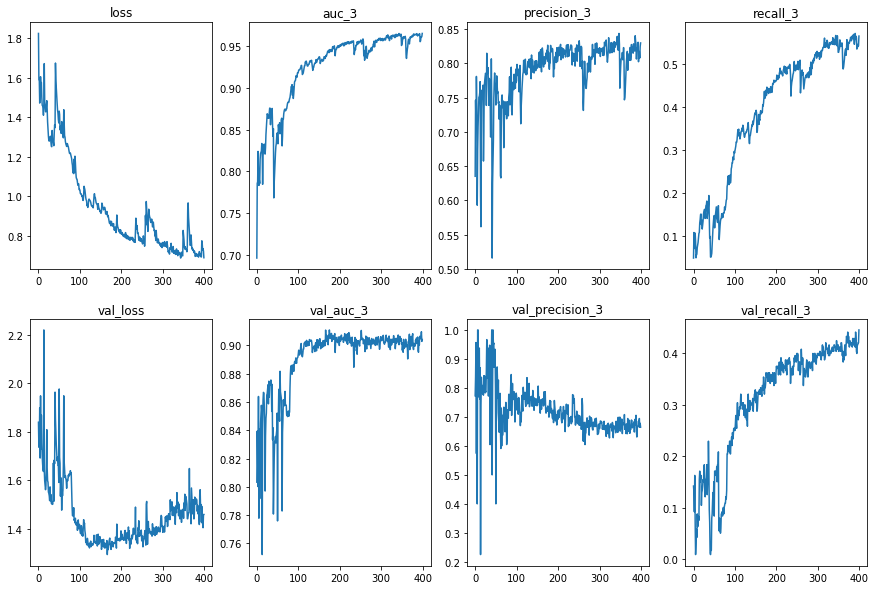

400


In [ ]:
plot_history_metrics(tissues_model_history)
print(epochs)
# auc to measure multi label accuarcy

4/4 [==============================] - 1s 21ms/step - loss: 1.4599 - auc_3: 0.9041 - precision_3: 0.6646 - recall_3: 0.4458
Loss : 1.4599031209945679
Area under the Curve (ROC) : 0.9041006565093994
Precision : 0.6645962595939636
Recall : 0.44583332538604736
2702 2713
[0.0, 149.0, 298.0, 447.0, 596.0, 745.0, 895.0, 1044.0, 1193.0, 1342.0, 1491.0, 1640.0, 1790.0, 1939.0, 2088.0, 2237.0, 2386.0, 2535.0, 2685.0, 2834.0, 2983.0, 3132.0, 3281.0, 3430.0, 3580.0, 3729.0, 3878.0, 4027.0, 4176.0, 4325.0, 4475.0, 4624.0, 4773.0, 4922.0, 5071.0, 5220.0, 5370.0, 5519.0, 5668.0, 5817.0, 5966.0, 6115.0, 6265.0, 6414.0, 6563.0, 6712.0, 6861.0, 7010.0, 7160.0, 7309.0, 7458.0, 7607.0, 7756.0, 7905.0, 8055.0, 8204.0, 8353.0, 8502.0, 8654.0, 8805.0]
(60,)


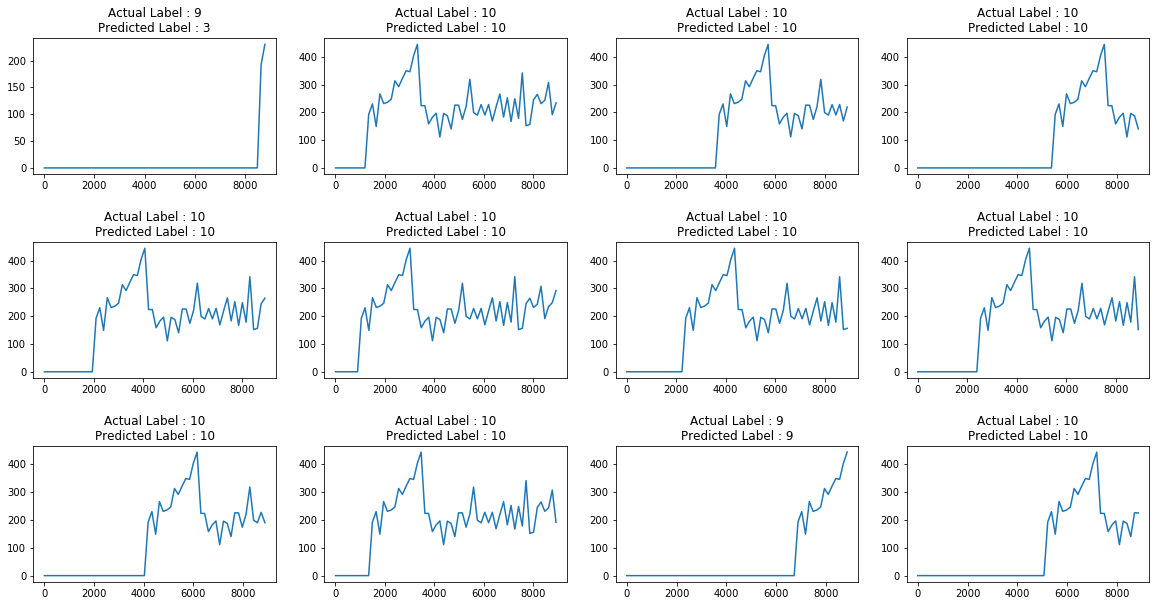

In [ ]:
loss, auc, precision, recall = tissues_model.evaluate(test_dataset)
print(f"Loss : {loss}")
print(f"Area under the Curve (ROC) : {auc}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")


def view_evaluated_eeg_plots(model):
    start_index = random.randint(10, len(tissues))
    end_index = start_index + 11
    print(start_index,end_index)
    time = tissues.loc[start_index:end_index, "time"]
    data1 = tissues.loc[start_index:end_index, "pos"]
    data2 = tissues.loc[start_index:end_index, "force"]

    data1_array = [scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in data1]
    data2_array = [scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in data2]
    data1_array = [np.asarray(data1_array).astype(np.float32).reshape(-1, 60, 1)]
    data2_array = [np.asarray(data2_array).astype(np.float32).reshape(-1, 60, 1)]
    data_array = tf.concat([data1_array, data2_array], 3)
    data_array = data_array.numpy()
    data_array = data_array[0]

    print(time.iloc[0])
    print(np.shape(time.iloc[0]))

    original_labels = tissues.loc[start_index:end_index, "tag"]
    predicted_labels = np.argmax(model.predict(data_array, verbose=0), axis=1)

    total_plots = 12
    cols = total_plots // 3
    rows = total_plots // cols
    if total_plots % cols != 0:
        rows += 1
    pos = range(1, total_plots + 1)
    fig = plt.figure(figsize=(20, 10))
    for i in range(12):
        plt.subplot(rows, cols, pos[i])
        plt.plot(time.iloc[i], data2.iloc[i])
        plt.title(f"Actual Label : {original_labels.iloc[i]}\nPredicted Label : {predicted_labels[i]}")
        fig.subplots_adjust(hspace=0.5)
    plt.show()


view_evaluated_eeg_plots(tissues_model)